# Make money in stocks

## Part 3

### Import packages

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step 1: Import data and perform data pre-processing.

In [9]:
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
sp500["Symbol"] = sp500["Symbol"].str.replace(".", "-", regex=True)
sectors=sp500['GICS Sector'].unique()[0:5]
sp50=sp500[sp500['GICS Sector'].isin(sectors)]
sp50=sp50[sp50['Date first added']<'2017-01-01']
sp50=sp50[0:50]
company_symbol=sp50['Symbol'].tolist()
data=yf.download(tickers=company_symbol,start="2017-10-01",end = '2022-11-26', group_by='ticker')

for symbol in company_symbol:
    data[symbol,'Return']=np.log(data[symbol]['Close']/data[symbol]['Close'].shift(1))
data_close=pd.DataFrame(data=None,columns=company_symbol)

for i in range(50):
    data_close[company_symbol[i]]=data[company_symbol[i]].loc[:,'Close']
data_close

company_industrial=sp50[sp50['GICS Sector']==sectors[0]]['Symbol']
company_health_care=sp50[sp50['GICS Sector']==sectors[1]]['Symbol']
company_it=sp50[sp50['GICS Sector']==sectors[2]]['Symbol']
company_communication_services=sp50[sp50['GICS Sector']==sectors[3]]['Symbol']
company_consumer_staples=sp50[sp50['GICS Sector']==sectors[4]]['Symbol']

[*********************100%***********************]  50 of 50 completed


### Step 2: Split the close price data into 5 sectors. 

In [10]:
data_industrial=data_close[company_industrial]
data_health_care=data_close[company_health_care]
data_it=data_close[company_it]
data_communication_services=data_close[company_communication_services]
data_consumer_staples=data_close[company_consumer_staples]

### Step 3: Construct data for last 3 years.

In [22]:
data_industrial_3y=data_industrial[data_industrial.index>'2019-01-01']
data_health_care_3y=data_health_care[data_health_care.index>'2019-01-01']
data_it_3y=data_it[data_it.index>'2019-01-01']
data_communication_services_3y=data_communication_services[data_communication_services.index>'2019-01-01']
data_consumer_staples_3y=data_consumer_staples[data_consumer_staples.index>'2019-01-01']

### Step 4: Plot the stocks' trend during last 3 years for each sector.

#### Stock prices of diffenrent companies of Industrial sector during the last 3 years

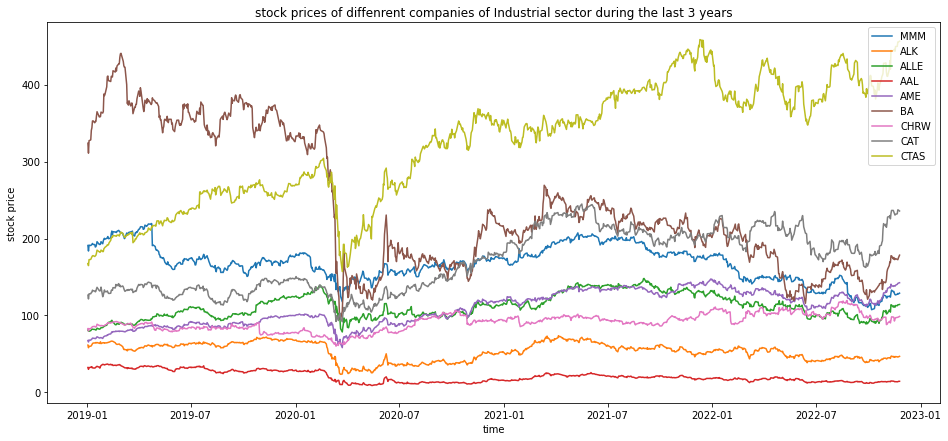

In [12]:
plt.figure(figsize=(16,7))
plt.plot(data_industrial_3y)
plt.legend(company_industrial, loc='upper right')
plt.title('stock prices of diffenrent companies of Industrial sector during the last 3 years')
plt.xlabel('time')
plt.ylabel('stock price')
plt.show()

#### Stock prices of diffenrent companies of Health Care sector during the last 3 years

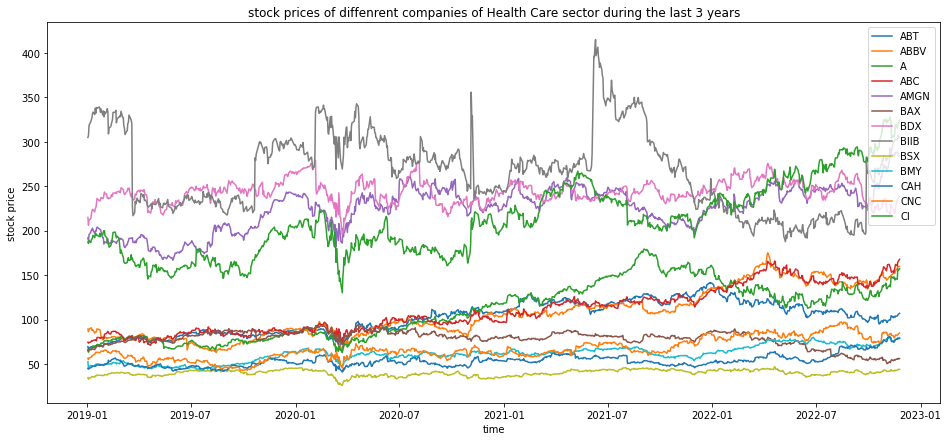

In [23]:
plt.figure(figsize=(16,7))
plt.plot(data_health_care_3y)
plt.legend(company_health_care, loc='upper right')
plt.title('stock prices of diffenrent companies of Health Care sector during the last 3 years')
plt.xlabel('time')
plt.ylabel('stock price')
plt.show()

#### Stock prices of diffenrent companies of IT sector during the last 3 years

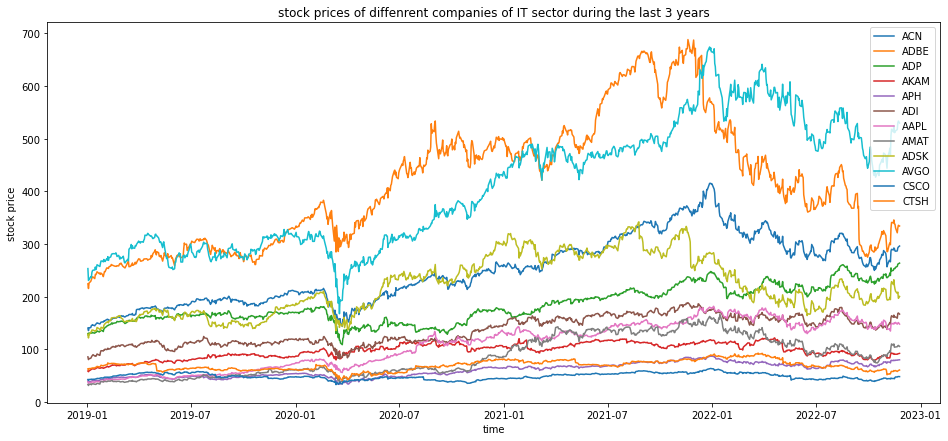

In [14]:
plt.figure(figsize=(16,7))
plt.plot(data_it_3y)
plt.legend(company_it, loc='upper right')
plt.title('stock prices of diffenrent companies of IT sector during the last 3 years')
plt.xlabel('time')
plt.ylabel('stock price')
plt.show()

#### Stock prices of diffenrent companies of Communication Services sector during the last 3 years

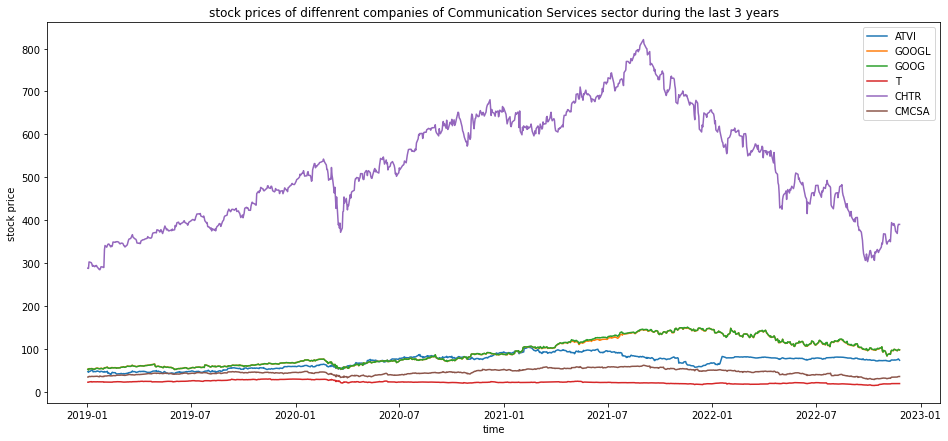

In [15]:
plt.figure(figsize=(16,7))
plt.plot(data_communication_services_3y)
plt.legend(company_communication_services, loc='upper right')
plt.title('stock prices of diffenrent companies of Communication Services sector during the last 3 years')
plt.xlabel('time')
plt.ylabel('stock price')
plt.show()

#### Stock prices of diffenrent companies of Consumer Staples sector during the last 3 years

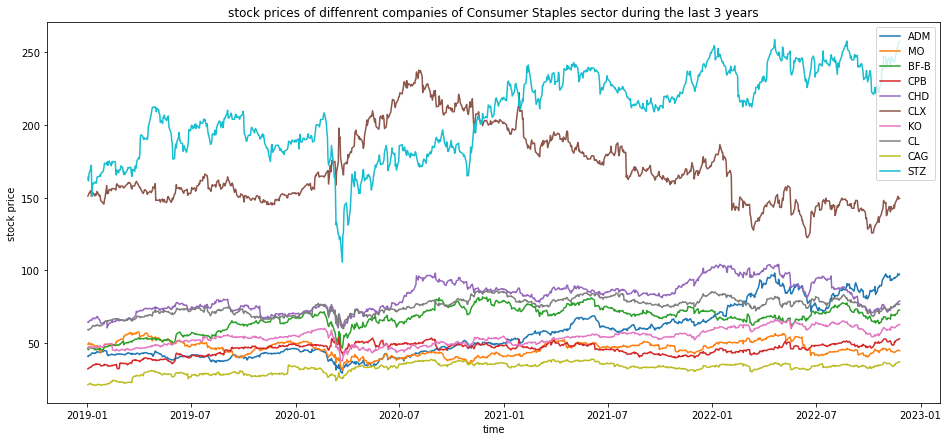

In [16]:
plt.figure(figsize=(16,7))
plt.plot(data_consumer_staples_3y)
plt.legend(company_consumer_staples, loc='upper right')
plt.title('stock prices of diffenrent companies of Consumer Staples sector during the last 3 years')
plt.xlabel('time')
plt.ylabel('stock price')
plt.show()

### Step 5: Find the turning point for part(5).

In [27]:
print(data['STZ','Close'].idxmin())
print(data['AVGO','Close'].idxmin())
print(data['CI','Close'].idxmin())
print(data['BA','Close'].idxmin())

2020-03-23 00:00:00
2020-03-18 00:00:00
2020-03-23 00:00:00
2020-03-20 00:00:00
